In [148]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# importing sub-libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

In [150]:
# loading the data set
bk = pd.read_csv(r'D:\Projects\Python\Bank\kunal mhetre - bank - kunal mhetre - bank.csv')

In [151]:
# Doing exploratory analysis
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [152]:
# checking first 5 elements
bk.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [153]:
# checking last five elements
bk.tail()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,2,7,no


In [154]:
bk.describe()

,age,balance,current-campaign,previous-campaign
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630,0.542579
std,10.576211,3009.638142,3.109807,1.693562
min,19.000000,-3313.000000,1.000000,0.000000
25%,33.000000,69.000000,1.000000,0.000000
50%,39.000000,444.000000,2.000000,0.000000
75%,49.000000,1480.000000,3.000000,0.000000
max,87.000000,71188.000000,50.000000,25.000000


In [155]:
bk.describe(include = 'O')

,job,marital,education,default,housing-loan,personal-loan,subscribed
count,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,2
top,management,married,secondary,no,yes,no,no
freq,969,2797,2306,4445,2559,3830,4000


In [156]:
bk.corr()

,age,balance,current-campaign,previous-campaign
age,1.000000,0.083820,-0.005148,-0.003511
balance,0.083820,1.000000,-0.009976,0.026196
current-campaign,-0.005148,-0.009976,1.000000,-0.067833
previous-campaign,-0.003511,0.026196,-0.067833,1.000000


<AxesSubplot:>

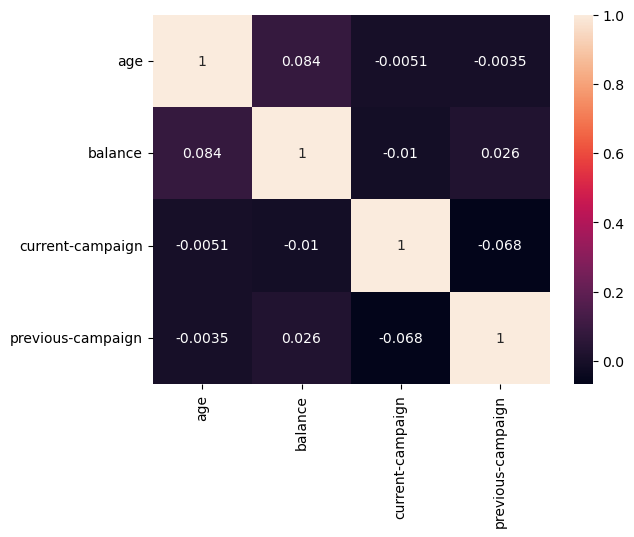

In [157]:
sns.heatmap(bk.corr(), annot = True)

In [158]:
# checking counts of elements
bk.value_counts('job')

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
dtype: int64

In [159]:
bk.value_counts('marital')

marital
married     2797
single      1196
divorced     528
dtype: int64

In [160]:
bk.value_counts('education')

education
secondary    2306
tertiary     1350
primary       678
unknown       187
dtype: int64

In [161]:
bk.value_counts('default')

default
no     4445
yes      76
dtype: int64

In [162]:
bk.value_counts('housing-loan')

housing-loan
yes    2559
no     1962
dtype: int64

In [163]:
bk.value_counts('personal-loan')

personal-loan
no     3830
yes     691
dtype: int64

In [164]:
bk.value_counts('subscribed')

subscribed
no     4000
yes     521
dtype: int64

In [165]:
# as we got 'unknown' element. Making unknown element as null value.
bk1 = pd.read_csv(r'D:\Projects\Python\Bank\kunal mhetre - bank - kunal mhetre - bank.csv', na_values=['unknown'])

In [166]:
bk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4483 non-null   object
 2   marital            4521 non-null   object
 3   education          4334 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [167]:
bk1.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [168]:
bk1.tail()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,2,7,no


In [169]:
# Checkinjg for null values
bk1.isna().sum()

age                    0
job                   38
marital                0
education            187
default                0
balance                0
housing-loan           0
personal-loan          0
current-campaign       0
previous-campaign      0
subscribed             0
dtype: int64

In [170]:
# removing the null values
bk2 = bk1.dropna(axis = 0)

In [171]:
# checking again for null values
bk2.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing-loan         0
personal-loan        0
current-campaign     0
previous-campaign    0
subscribed           0
dtype: int64

d:\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


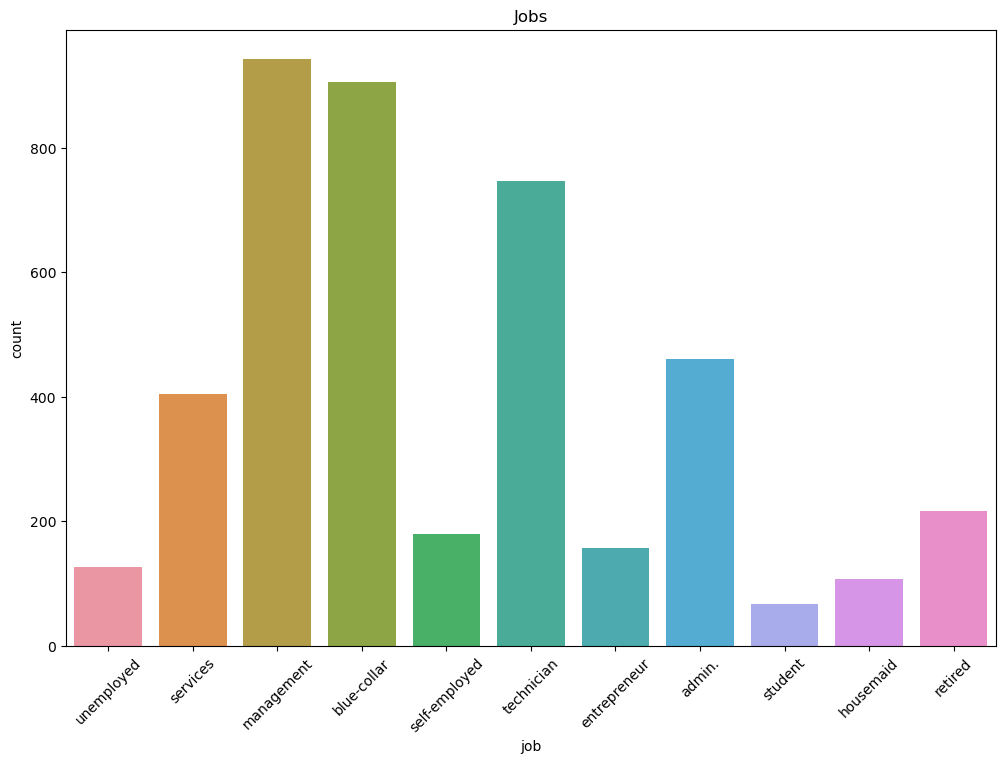

In [172]:
# plotting countplot for job
plt.figure(figsize=(12, 8))
sns.countplot(bk2.job)
plt.title('Jobs')
plt.xticks(rotation=45)
plt.show()

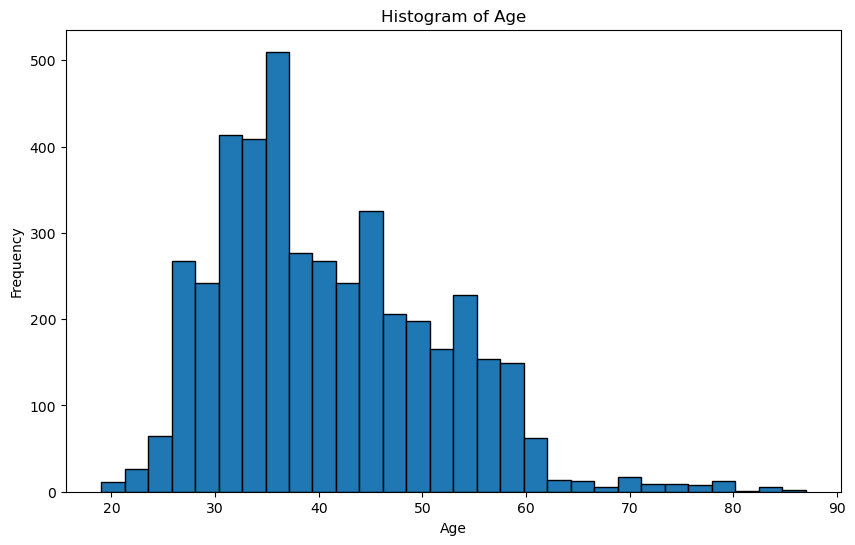

In [173]:
# Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(bk2['age'], bins=30, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

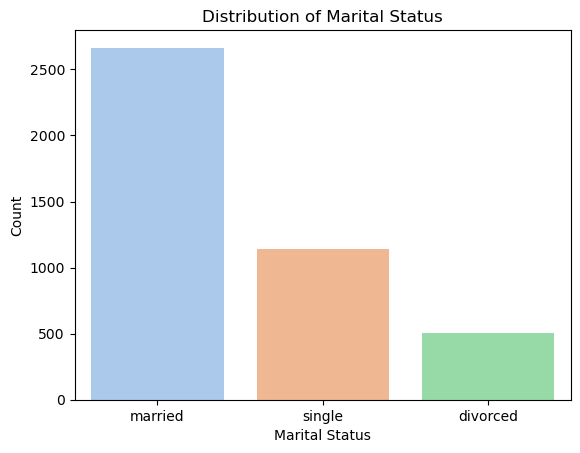

In [174]:
# Bar plot for the distribution of 'marital' status

sns.countplot(x='marital', data=bk2, palette='pastel')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()


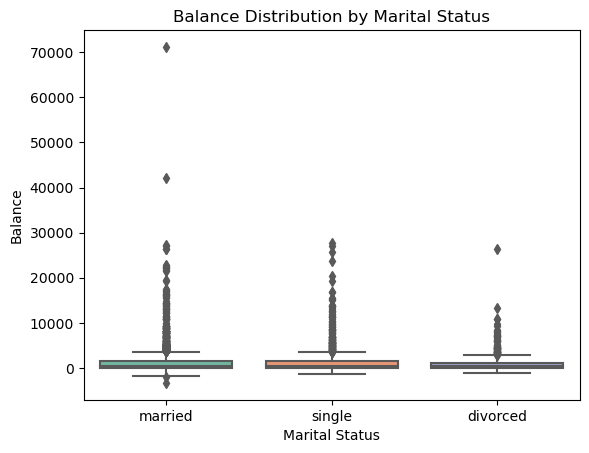

In [175]:
# Boxplot for the 'balance' column grouped by 'marital' status
sns.boxplot(x='marital', y='balance', data=bk2, palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.title('Balance Distribution by Marital Status')
plt.show()


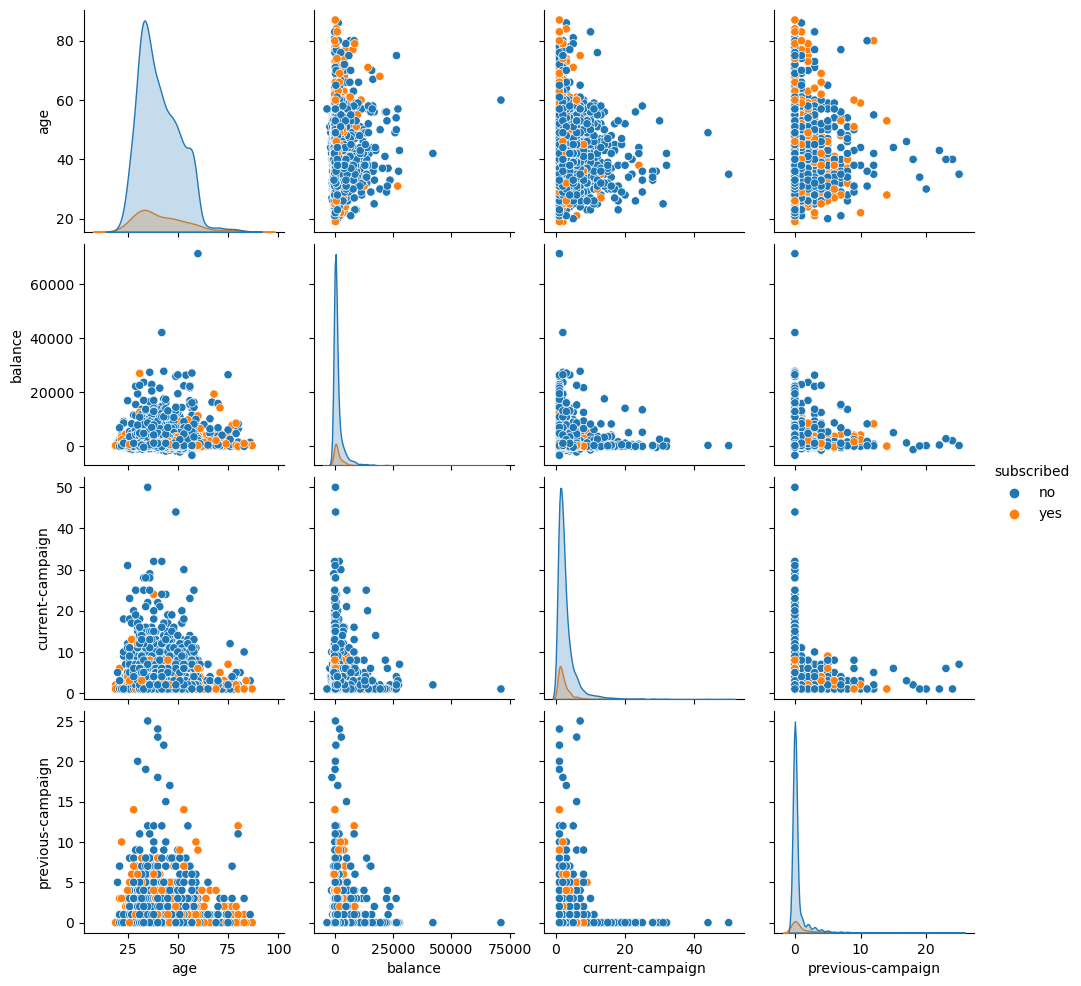

In [176]:
# Pairplot for numerical columns
sns.pairplot(bk2[['age', 'balance', 'current-campaign', 'previous-campaign', 'subscribed']], hue='subscribed', diag_kind='kde')
plt.show()


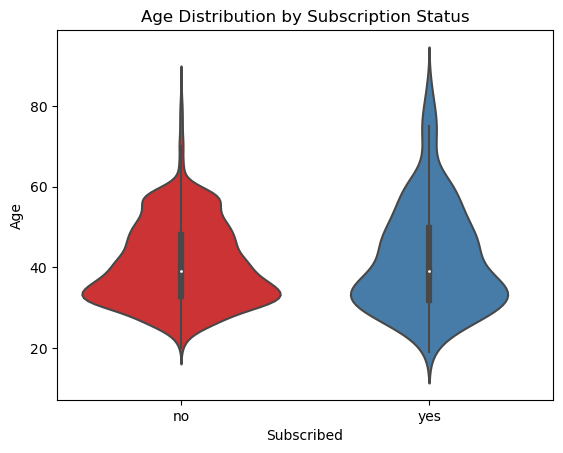

In [177]:
# Violin plot for the distribution of 'age' grouped by 'subscribed'

sns.violinplot(x='subscribed', y='age', data=bk2, palette='Set1')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.title('Age Distribution by Subscription Status')
plt.show()


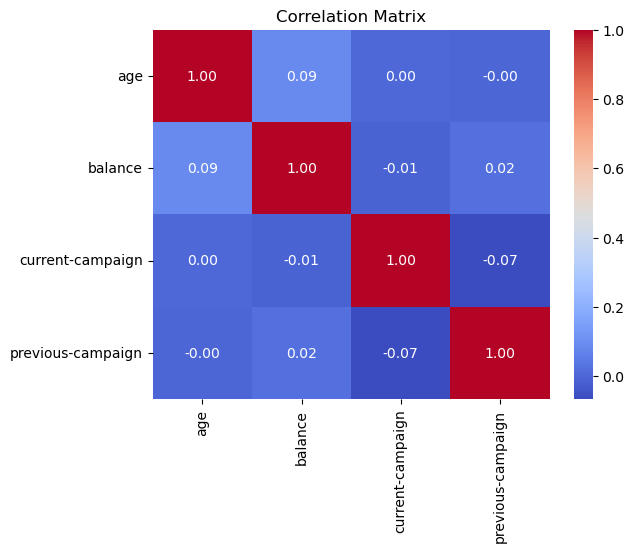

In [178]:
# Heatmap to visualize the correlation between numerical features
corr = bk2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [179]:
# Creating features(X) and target(y)
X = bk2.drop('subscribed', axis = 1)

In [180]:
X

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign
0,30,unemployed,married,primary,no,1787,no,no,1,0
1,33,services,married,secondary,no,4789,yes,yes,1,4
2,35,management,single,tertiary,no,1350,yes,no,1,1
3,30,management,married,tertiary,no,1476,yes,yes,4,0
4,59,blue-collar,married,secondary,no,0,yes,no,1,0
...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,5,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0
4518,57,technician,married,secondary,no,295,no,no,11,0
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3


In [181]:
y = bk2['subscribed']

In [182]:
y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: subscribed, Length: 4311, dtype: object

In [183]:
# getting dummy variables
dummies = pd.get_dummies(X)

In [184]:
# renaming dummies as X1
X1 = dummies

In [185]:
X1

,age,balance,current-campaign,previous-campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing-loan_no,housing-loan_yes,personal-loan_no,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,35,1350,1,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0
3,30,1476,4,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
4,59,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4517,57,-3313,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
4518,57,295,11,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4519,28,1137,4,3,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


# Creating the Model

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 42)

In [187]:
X_train

,age,balance,current-campaign,previous-campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing-loan_no,housing-loan_yes,personal-loan_no,personal-loan_yes
1202,41,654,2,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
231,40,3571,3,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3732,34,79,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
507,42,360,5,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2773,35,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,36,-435,8,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
487,52,779,3,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3239,52,2087,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3953,40,51,2,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [188]:
y_train

1202     no
231      no
3732     no
507      no
2773    yes
       ... 
3610     no
487      no
3239    yes
3953     no
898      no
Name: subscribed, Length: 3017, dtype: object

In [189]:
logistic = LogisticRegression()

In [190]:
# running model
logistic.fit(X_train,y_train)


d:\Software\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
y_pred = logistic.predict(X_test)

In [192]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [193]:
# creating confusion metrix
cm = confusion_matrix(y_test,y_pred)

In [194]:
cm

array([[1155,    3],
       [ 136,    0]], dtype=int64)

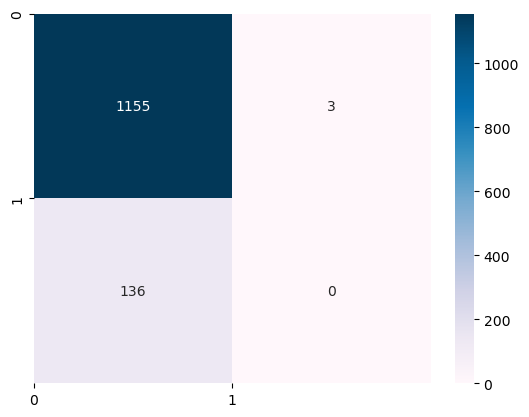

In [195]:
# creating map of confusion metrix
sns.heatmap(cm, annot = True, cmap = "PuBu", fmt = 'd')
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [196]:
# checking score
a_score = accuracy_score(y_test,y_pred)
a_score

0.89258114374034